transfer wiedzy jesli
a) nauczyciel zna rzecz x
b) uczen nie zna rzeczy x
c) roznica w porcjach wiedzy jest rowna 1
d) są sąsiadami

naraz uczysz sie jednej rzeczy
jak nie wiesz od kogo sie uczyc bo remis do rzut moneta
niedeterminizm moze sie zdazyc tylko dlatego ze moze byc wiecej niz 1 mozliwy nauczyciel w jednym kroku
czasem zdazy sie ze w ukladzie nie ma wiedzy o jednej z rzeczy - nikt sie tego juz wtedy nie nauczy, bo nie ma skad wziac wiedzy
jesli mamy nauczyciela i nie wiem, ktorej wiedzy sie nauczyc (bo ma np. 2 czastki wiedzy dostepne), to losujemy czego sie dowiedzielismy

synchronicznie (czyli na trzy-cztery). W jednym kroku tylko jedna nauka dla kazdego
nie bedzie na zywo wizualizacji, ale np. kontroluj % osob co zna excela co krok; albo ktorzy wszystko potrafia

In [23]:
K = 4 #liczba cząstek wiedzy
posiadaczeK4p9 = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK2p9 = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK4p7 = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK2p7 = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK4p5 = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK2p5 = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK4p3 = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.3
posiadaczeK2p3 = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.3

posiadaczeK4p9Ar = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK2p9Ar = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK4p7Ar = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK2p7Ar = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK4p5Ar = [] #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK2p5Ar = [] #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK4p3Ar = [] 
posiadaczeK2p3Ar = []

l = 5 #długość boku kwadratowej siatki z agentami
R = 50 #liczba niezależnych symulacji do przeprowadzenia
tableT1 = [] #tablica na obecny krok
tableT2 = [] #tablica na następny krok

In [24]:
#PLAN
#dwa pomysły:
#pierwszy - dla każdej komórki losujesz najpierw WSZYSTKIE po kolei kawałki wiedzy i oznaczasz a,b,c,d; jak nie ma to;
#zapisujesz to właśnie jako string w tablicy, np. a-cd, albo a--d i wgl
#następnie jak sprawdzasz to najpierw liczysz ile "-" w stringu żeby określić różnicę wiedzy
#skoro jest to sprawdzasz jakie literki zostają wolne i losujesz, potem podmieniasz

#drugi pomysł: dla każdej wiedzy osobna matryca, ale meh

In [25]:
from math import floor
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [26]:
for i in range(0,50):
    #dla p = 0.9
    tableT1 = []
    posiadaczeK4p9 = []
    posiadaczeK2p9 = []
    p = 0.9
    counter = 0
    K4 = 0
    K2 = 0
    #wylosowanie wiedzy
    while counter < l*l:
        rndm = random.random()
        if rndm > p:
            wiedza = "-"
        else:
            wiedza = "a"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "b"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "c"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "d"
        print(wiedza)
        #policz ile "-" w stringu
        ilosc = wiedza.count("-")
        if ilosc == 2:
            K2 = K2+1
        elif ilosc ==0:
            K4 = K4+1
        tableT1.append(wiedza)
        counter = counter + 1
    posiadaczeK4p9.append(K4)
    posiadaczeK2p9.append(K2)
    print(K2/(l*l))
    print(K4/(l*l))
    ##########################################################################
    #w warunkach jest zla liczba "-", chyba -1 zamiast + 1
    check = True #check jest od zakończenia programu jeśli nie będzie transferu wiedzy
    K4 = posiadaczeK4p9[-1]
    K2 = posiadaczeK2p9[-1]
    print(K4, K2)
    tabKierunek = [] #do trzymania sąsiadów od których możliwa jest nauka a pozniej czastek wiedzy ktorych mozna sie nauczyc
    while check:
        check = False
        tableT2 = []
        counter = 0
        while counter < len(tableT1):
            #gora
            if tableT1[counter-l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-l])
                print("góra")
            #prawo - przypadek końcowy
            if counter == len(tableT1)-1 and tableT1[0].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[0])
                print("prawo końcowy")
            #prawo - przypadek normalny
            elif counter != len(tableT1)-1 and tableT1[counter + 1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+1])
                print("prawo normalny")
            #dol - przypadek końcowy
            if counter >= l*(l-1) and tableT1[counter -(l*(l-1))].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter -(l*(l-1))])
                print("dół końcowy")
            #dol - przypadek normalny
            elif counter < l*(l-1) and tableT1[counter+l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+l])
                print("dół normalny")
                print(counter)
            #lewo
            if tableT1[counter-1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-1])
                print("lewo")
            los = 0
            if len(tabKierunek)>1: #jeśli mamy więcej niż jednego nauczyciela losuje go
                los = random.randint(0,len(tabKierunek)-1)
            print(len(tabKierunek), check)
            if len(tabKierunek)!=0: #jeśli mamy jakiegoś nauczyciela to robimy transfer
                check = True
                #print("tabKier",tabKierunek)
                #print("los",los)
                nauczyciel = tabKierunek[los]
                uczen = tableT1[counter]
                print(uczen)
                print(nauczyciel)
                tabKierunek = []
                los = 0
                counter2 = 0
                print(uczen[0])
                print(nauczyciel[0])
                while counter2 < len(nauczyciel):
                    if uczen[counter2]=="-" and nauczyciel[counter2]!="-":
                        tabKierunek.append(counter2)
                    counter2 = counter2+1
                if len(tabKierunek) > 1:
                    los = random.randint(0,len(tabKierunek)-1)
                #print(los)
                #print(tabKierunek)
                #print(tabKierunek[los])
                #list1 = list(str1)
                #list1[5] = 'u'
                #str1 = ''.join(list1)
                uczenList = list(uczen)
                uczenList[tabKierunek[los]] = "x"
                uczen = "".join(uczenList)
                #uczen[tabKierunek[los]]="x" #!!!! TO PRZYPISANIE JEST NIELEGALNE, ZMIEN I POWINNO COS DZIALAC
                print(uczen)
                if uczen.count("-") == 2:
                    K2 = K2+1
                elif uczen.count("-") == 1:
                    K2 = K2-1
                elif uczen.count("-") == 0:
                    K4 = K4+1
                tableT2.append(uczen)
                tabKierunek = []
                #po kolei przeleć przez elementy stringów i zobacz gdzie nauczyciel lepszy
                #potem wylosuj czy coś
                #podmień i popchnij do tableT2
                #wyczysc tabKierunek
            else:
                tableT2.append(tableT1[counter])
            counter = counter + 1
        if check:
            tableT1 = tableT2
            print(K4, K2)
            posiadaczeK4p9.append(K4)
            posiadaczeK2p9.append(K2)
        #po kolei idę i sprawdzam czy sąsiedzi mają większą o 1 wiedzę DONE
        #jeśli nie znajdę to dalej DONE
        #jeśli znajdę to wybieram/losuję przy remisie DONE
        #sprawdzam co nauczyciel wiego czego obecny nie wie, los przy remisie
        #następuje przejęcie, nowego pushuję do TableT2, check = True, jeśli uczył się od dwójki to obecni K2 +1, jeśli od 4 to K4 + 1, od 3 K2-1, inaczej nic
        #na końcu podmieniam tablicę T1=T2, T2 = []
    posiadaczeK4p9Ar.append(posiadaczeK4p9)
    posiadaczeK2p9Ar.append(posiadaczeK2p9)
    print(i,"/50")

abcd
abcd
abcd
abcd
abc-
abc-
abcd
abcd
abcd
abcd
-bcd
abcd
abc-
abcd
abcd
abcd
-bcd
ab-d
abcd
ab--
abcd
abcd
abcd
abcd
abcd
0.04
0.72
18 1
0 False
0 False
0 False
0 False
góra
dół normalny
4
lewo
3 False
abc-
abcd
a
a
abcx
góra
prawo normalny
2 True
abc-
abcd
a
a
abcx
0 True
0 True
0 True
0 True
prawo normalny
dół normalny
10
lewo
3 True
-bcd
abcd
-
a
xbcd
0 True
góra
prawo normalny
lewo
3 True
abc-
abcd
a
a
abcx
0 True
0 True
0 True
góra
dół normalny
16
lewo
3 True
-bcd
abcd
-
a
xbcd
prawo normalny
dół normalny
17
2 True
ab-d
abcd
a
a
abxd
0 True
0 True
0 True
0 True
0 True
0 True
0 True
24 1
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 /50
-bcd
abc-
abcd
abcd
abcd
abcd
a-c-
abcd
ab-d
ab-d
abcd
abcd
abcd
abcd
abcd
abcd
abcd
abcd
abcd
abcd
-bcd
-bc-
abcd
abcd
ab--
0.12
0.68
17 3
dół normalny
0
1 False
-bcd
abcd
-
a
xbcd
prawo norm

In [27]:
for i in range(0,50):
    #dla p = 0.7
    tableT1 = []
    posiadaczeK4p7 = []
    posiadaczeK2p7 = []
    p = 0.7
    counter = 0
    K4 = 0
    K2 = 0
    #wylosowanie wiedzy
    while counter < l*l:
        rndm = random.random()
        if rndm > p:
            wiedza = "-"
        else:
            wiedza = "a"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "b"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "c"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "d"
        print(wiedza)
        #policz ile "-" w stringu
        ilosc = wiedza.count("-")
        if ilosc == 2:
            K2 = K2+1
        elif ilosc == 0:
            K4 = K4+1
        tableT1.append(wiedza)
        counter = counter + 1
    posiadaczeK4p7.append(K4)
    posiadaczeK2p7.append(K2)
    print(K2/(l*l))
    print(K4/(l*l))
    ##########################################################################
    #w warunkach jest zla liczba "-", chyba -1 zamiast + 1
    check = True #check jest od zakończenia programu jeśli nie będzie transferu wiedzy
    K4 = posiadaczeK4p7[-1]
    K2 = posiadaczeK2p7[-1]
    print(K4, K2)
    tabKierunek = [] #do trzymania sąsiadów od których możliwa jest nauka a pozniej czastek wiedzy ktorych mozna sie nauczyc
    while check:
        print(K2)
        check = False
        tableT2 = []
        counter = 0
        while counter < len(tableT1):
            #gora
            if tableT1[counter-l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-l])
                print("góra")
            #prawo - przypadek końcowy
            if counter == len(tableT1)-1 and tableT1[0].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[0])
                print("prawo końcowy")
            #prawo - przypadek normalny
            elif counter != len(tableT1)-1 and tableT1[counter + 1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+1])
                print("prawo normalny")
            #dol - przypadek końcowy
            if counter >= l*(l-1) and tableT1[counter -(l*(l-1))].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter -(l*(l-1))])
                print("dół końcowy")
            #dol - przypadek normalny
            elif counter < l*(l-1) and tableT1[counter+l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+l])
                print("dół normalny")
                print(counter)
            #lewo
            if tableT1[counter-1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-1])
                print("lewo")
            los = 0
            if len(tabKierunek)>1: #jeśli mamy więcej niż jednego nauczyciela losuje go
                los = random.randint(0,len(tabKierunek)-1)
            print(len(tabKierunek), check)
            if len(tabKierunek)!=0: #jeśli mamy jakiegoś nauczyciela to robimy transfer
                check = True
                #print("tabKier",tabKierunek)
                #print("los",los)
                nauczyciel = tabKierunek[los]
                uczen = tableT1[counter]
                print(uczen)
                print(nauczyciel)
                tabKierunek = []
                los = 0
                counter2 = 0
                print(uczen[0])
                print(nauczyciel[0])
                while counter2 < len(nauczyciel):
                    if uczen[counter2]=="-" and nauczyciel[counter2]!="-":
                        tabKierunek.append(counter2)
                    counter2 = counter2+1
                if len(tabKierunek) > 1:
                    los = random.randint(0,len(tabKierunek)-1)
                #print(los)
                #print(tabKierunek)
                #print(tabKierunek[los])
                #list1 = list(str1)
                #list1[5] = 'u'
                #str1 = ''.join(list1)
                uczenList = list(uczen)
                uczenList[tabKierunek[los]] = "x"
                uczen = "".join(uczenList)
                #uczen[tabKierunek[los]]="x" #!!!! TO PRZYPISANIE JEST NIELEGALNE, ZMIEN I POWINNO COS DZIALAC
                print(uczen)
                if uczen.count("-") == 2:
                    K2 = K2+1
                elif uczen.count("-") == 1:
                    K2 = K2-1
                elif uczen.count("-") == 0:
                    K4 = K4+1
                tableT2.append(uczen)
                tabKierunek = []
                #po kolei przeleć przez elementy stringów i zobacz gdzie nauczyciel lepszy
                #potem wylosuj czy coś
                #podmień i popchnij do tableT2
                #wyczysc tabKierunek
            else:
                tableT2.append(tableT1[counter])
            counter = counter + 1
        if check:
            tableT1 = tableT2
            print(K4, K2)
            posiadaczeK4p7.append(K4)
            posiadaczeK2p7.append(K2)
        #po kolei idę i sprawdzam czy sąsiedzi mają większą o 1 wiedzę DONE
        #jeśli nie znajdę to dalej DONE
        #jeśli znajdę to wybieram/losuję przy remisie DONE
        #sprawdzam co nauczyciel wiego czego obecny nie wie, los przy remisie
        #następuje przejęcie, nowego pushuję do TableT2, check = True, jeśli uczył się od dwójki to obecni K2 +1, jeśli od 4 to K4 + 1, od 3 K2-1, inaczej nic
        #na końcu podmieniam tablicę T1=T2, T2 = []
    posiadaczeK4p7Ar.append(posiadaczeK4p7)
    posiadaczeK2p7Ar.append(posiadaczeK2p7)
    print(i,"/50")

abcd
abcd
-b--
a-c-
ab-d
a-cd
---d
abcd
abcd
a-cd
--cd
-bcd
abcd
abcd
---d
ab-d
abc-
abc-
----
----
-bcd
abcd
a-cd
ab-d
ab--
0.12
0.28
7 3
3
0 False
0 False
prawo normalny
1 False
-b--
a-c-
-
a
-bx-
góra
prawo normalny
2 True
a-c-
ab-d
a
a
axc-
0 True
góra
1 True
a-cd
abcd
a
a
axcd
0 True
0 True
0 True
lewo
1 True
a-cd
abcd
a
a
axcd
góra
prawo normalny
dół normalny
10
lewo
4 True
--cd
a-cd
-
a
x-cd
prawo normalny
1 True
-bcd
abcd
-
a
xbcd
0 True
0 True
0 True
0 True
dół normalny
16
1 True
abc-
abcd
a
a
abcx
góra
1 True
abc-
abcd
a
a
abcx
0 True
góra
1 True
----
---d
-
-
---x
prawo normalny
dół końcowy
2 True
-bcd
abcd
-
a
xbcd
0 True
lewo
1 True
a-cd
abcd
a
a
axcd
0 True
dół końcowy
lewo
2 True
ab--
ab-d
a
a
ab-x
14 1
1
0 False
0 False
prawo normalny
1 False
-bx-
axc-
-
a
xbx-
dół normalny
3
1 True
axc-
abcd
a
a
axcx
prawo normalny
dół normalny
4
2 True
ab-d
axcd
a
a
abxd
0 True
0 True
0 True
0 True
0 True
góra
prawo normalny
lewo
3 True
x-cd
axcd
x
a
xxcd
0 True
0 True
0 True
0 True
p

In [28]:
for i in range(0,50):
    #dla p = 0.5
    tableT1 = []
    posiadaczeK4p5 = []
    posiadaczeK2p5 = []
    p = 0.5
    counter = 0
    K4 = 0
    K2 = 0
    #wylosowanie wiedzy
    while counter < l*l:
        rndm = random.random()
        if rndm > p:
            wiedza = "-"
        else:
            wiedza = "a"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "b"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "c"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "d"
        print(wiedza)
        #policz ile "-" w stringu
        ilosc = wiedza.count("-")
        if ilosc == 2:
            K2 = K2+1
        elif ilosc ==0:
            K4 = K4+1
        tableT1.append(wiedza)
        counter = counter + 1
    posiadaczeK4p5.append(K4)
    posiadaczeK2p5.append(K2)
    #print(K2/(l*l))
    #print(K4/(l*l))
    ##########################################################################
    #w warunkach jest zla liczba "-", chyba -1 zamiast + 1
    check = True #check jest od zakończenia programu jeśli nie będzie transferu wiedzy
    K4 = posiadaczeK4p5[-1]
    K2 = posiadaczeK2p5[-1]
    #print(K4, K2)
    tabKierunek = [] #do trzymania sąsiadów od których możliwa jest nauka a pozniej czastek wiedzy ktorych mozna sie nauczyc
    while check:
        check = False
        tableT2 = []
        counter = 0
        while counter < len(tableT1):
            #gora
            if tableT1[counter-l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-l])
                #print("góra")
            #prawo - przypadek końcowy
            if counter == len(tableT1)-1 and tableT1[0].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[0])
                #print("prawo końcowy")
            #prawo - przypadek normalny
            elif counter != len(tableT1)-1 and tableT1[counter + 1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+1])
                #print("prawo normalny")
            #dol - przypadek końcowy
            if counter >= l*(l-1) and tableT1[counter -(l*(l-1))].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter -(l*(l-1))])
                #print("dół końcowy")
            #dol - przypadek normalny
            elif counter < l*(l-1) and tableT1[counter+l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+l])
                #print("dół normalny")
                #print(counter)
            #lewo
            if tableT1[counter-1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-1])
                #print("lewo")
            los = 0
            if len(tabKierunek)>1: #jeśli mamy więcej niż jednego nauczyciela losuje go
                los = random.randint(0,len(tabKierunek)-1)
            print(len(tabKierunek), check)
            if len(tabKierunek)!=0: #jeśli mamy jakiegoś nauczyciela to robimy transfer
                check = True
                #print("tabKier",tabKierunek)
                #print("los",los)
                nauczyciel = tabKierunek[los]
                uczen = tableT1[counter]
                #print(uczen)
                #print(nauczyciel)
                tabKierunek = []
                los = 0
                counter2 = 0
                #print(uczen[0])
                #print(nauczyciel[0])
                while counter2 < len(nauczyciel):
                    if uczen[counter2]=="-" and nauczyciel[counter2]!="-":
                        tabKierunek.append(counter2)
                    counter2 = counter2+1
                if len(tabKierunek) > 1:
                    los = random.randint(0,len(tabKierunek)-1)
                #print(los)
                #print(tabKierunek)
                #print(tabKierunek[los])
                #list1 = list(str1)
                #list1[5] = 'u'
                #str1 = ''.join(list1)
                uczenList = list(uczen)
                uczenList[tabKierunek[los]] = "x"
                uczen = "".join(uczenList)
                #uczen[tabKierunek[los]]="x" #!!!! TO PRZYPISANIE JEST NIELEGALNE, ZMIEN I POWINNO COS DZIALAC
                #print(uczen)
                if uczen.count("-") == 2:
                    K2 = K2+1
                elif uczen.count("-") == 1:
                    K2 = K2-1
                elif uczen.count("-") == 0:
                    K4 = K4+1
                tableT2.append(uczen)
                tabKierunek = []
                #po kolei przeleć przez elementy stringów i zobacz gdzie nauczyciel lepszy
                #potem wylosuj czy coś
                #podmień i popchnij do tableT2
                #wyczysc tabKierunek
            else:
                tableT2.append(tableT1[counter])
            counter = counter + 1
        if check:
            tableT1 = tableT2
            #print(K4, K2)
            posiadaczeK4p5.append(K4)
            posiadaczeK2p5.append(K2)
        #po kolei idę i sprawdzam czy sąsiedzi mają większą o 1 wiedzę DONE
        #jeśli nie znajdę to dalej DONE
        #jeśli znajdę to wybieram/losuję przy remisie DONE
        #sprawdzam co nauczyciel wiego czego obecny nie wie, los przy remisie
        #następuje przejęcie, nowego pushuję do TableT2, check = True, jeśli uczył się od dwójki to obecni K2 +1, jeśli od 4 to K4 + 1, od 3 K2-1, inaczej nic
        #na końcu podmieniam tablicę T1=T2, T2 = []
    posiadaczeK4p5Ar.append(posiadaczeK4p5)
    posiadaczeK2p5Ar.append(posiadaczeK2p5)
    print(i,"/50")

ab-d
ab--
a---
a-cd
ab--
----
a---
-b-d
-b--
--c-
-bc-
a--d
-b--
abc-
a--d
abcd
ab-d
-bcd
-b--
-bc-
abcd
-bc-
a-cd
--c-
abcd
2 False
1 True
2 True
0 True
1 True
1 True
3 True
0 True
1 True
3 True
0 True
1 True
2 True
0 True
1 True
0 True
1 True
0 True
1 True
0 True
0 True
2 True
0 True
0 True
0 True
0 False
1 False
3 True
0 True
1 True
2 True
2 True
0 True
2 True
2 True
1 True
1 True
3 True
0 True
1 True
0 True
0 True
1 True
2 True
1 True
0 True
2 True
0 True
1 True
0 True
0 False
0 False
1 False
1 True
0 True
2 True
2 True
4 True
0 True
2 True
2 True
0 True
2 True
1 True
0 True
0 True
0 True
0 True
1 True
3 True
0 True
0 True
2 True
3 True
0 True
0 False
0 False
0 False
0 False
0 False
4 False
0 True
3 True
3 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
0 True
4 True
0 True
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 False
0 F

In [29]:
for i in range(0,50):
    #dla p = 0.3
    tableT1 = []
    posiadaczeK4p3 = []
    posiadaczeK2p3 = []
    p = 0.3
    counter = 0
    K4 = 0
    K2 = 0
    #wylosowanie wiedzy
    while counter < l*l:
        rndm = random.random()
        if rndm > p:
            wiedza = "-"
        else:
            wiedza = "a"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "b"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "c"
        rndm = random.random()
        if rndm > p:
            wiedza = wiedza + "-"
        else:
            wiedza = wiedza + "d"
        print(wiedza)
        #policz ile "-" w stringu
        ilosc = wiedza.count("-")
        if ilosc == 2:
            K2 = K2+1
        elif ilosc ==0:
            K4 = K4+1
        tableT1.append(wiedza)
        counter = counter + 1
    posiadaczeK4p3.append(K4)
    posiadaczeK2p3.append(K2)
    print(K2/(l*l))
    print(K4/(l*l))
    ##########################################################################
    #w warunkach jest zla liczba "-", chyba -1 zamiast + 1
    check = True #check jest od zakończenia programu jeśli nie będzie transferu wiedzy
    K4 = posiadaczeK4p3[-1]
    K2 = posiadaczeK2p3[-1]
    print(K4, K2)
    tabKierunek = [] #do trzymania sąsiadów od których możliwa jest nauka a pozniej czastek wiedzy ktorych mozna sie nauczyc
    while check:
        check = False
        tableT2 = []
        counter = 0
        while counter < len(tableT1):
            #gora
            if tableT1[counter-l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-l])
                print("góra")
            #prawo - przypadek końcowy
            if counter == len(tableT1)-1 and tableT1[0].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[0])
                print("prawo końcowy")
            #prawo - przypadek normalny
            elif counter != len(tableT1)-1 and tableT1[counter + 1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+1])
                print("prawo normalny")
            #dol - przypadek końcowy
            if counter >= l*(l-1) and tableT1[counter -(l*(l-1))].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter -(l*(l-1))])
                print("dół końcowy")
            #dol - przypadek normalny
            elif counter < l*(l-1) and tableT1[counter+l].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter+l])
                print("dół normalny")
                print(counter)
            #lewo
            if tableT1[counter-1].count("-") == tableT1[counter].count("-") - 1:
                tabKierunek.append(tableT1[counter-1])
                print("lewo")
            los = 0
            if len(tabKierunek)>1: #jeśli mamy więcej niż jednego nauczyciela losuje go
                los = random.randint(0,len(tabKierunek)-1)
            print(len(tabKierunek), check)
            if len(tabKierunek)!=0: #jeśli mamy jakiegoś nauczyciela to robimy transfer
                check = True
                #print("tabKier",tabKierunek)
                #print("los",los)
                nauczyciel = tabKierunek[los]
                uczen = tableT1[counter]
                print(uczen)
                print(nauczyciel)
                tabKierunek = []
                los = 0
                counter2 = 0
                print(uczen[0])
                print(nauczyciel[0])
                while counter2 < len(nauczyciel):
                    if uczen[counter2]=="-" and nauczyciel[counter2]!="-":
                        tabKierunek.append(counter2)
                    counter2 = counter2+1
                if len(tabKierunek) > 1:
                    los = random.randint(0,len(tabKierunek)-1)
                #print(los)
                #print(tabKierunek)
                #print(tabKierunek[los])
                #list1 = list(str1)
                #list1[5] = 'u'
                #str1 = ''.join(list1)
                uczenList = list(uczen)
                uczenList[tabKierunek[los]] = "x"
                uczen = "".join(uczenList)
                #uczen[tabKierunek[los]]="x" #!!!! TO PRZYPISANIE JEST NIELEGALNE, ZMIEN I POWINNO COS DZIALAC
                print(uczen)
                if uczen.count("-") == 2:
                    K2 = K2+1
                elif uczen.count("-") == 1:
                    K2 = K2-1
                elif uczen.count("-") == 0:
                    K4 = K4+1
                tableT2.append(uczen)
                tabKierunek = []
                #po kolei przeleć przez elementy stringów i zobacz gdzie nauczyciel lepszy
                #potem wylosuj czy coś
                #podmień i popchnij do tableT2
                #wyczysc tabKierunek
            else:
                tableT2.append(tableT1[counter])
            counter = counter + 1
        if check:
            tableT1 = tableT2
            print(K4, K2)
            posiadaczeK4p3.append(K4)
            posiadaczeK2p3.append(K2)
        #po kolei idę i sprawdzam czy sąsiedzi mają większą o 1 wiedzę DONE
        #jeśli nie znajdę to dalej DONE
        #jeśli znajdę to wybieram/losuję przy remisie DONE
        #sprawdzam co nauczyciel wiego czego obecny nie wie, los przy remisie
        #następuje przejęcie, nowego pushuję do TableT2, check = True, jeśli uczył się od dwójki to obecni K2 +1, jeśli od 4 to K4 + 1, od 3 K2-1, inaczej nic
        #na końcu podmieniam tablicę T1=T2, T2 = []
    posiadaczeK4p3Ar.append(posiadaczeK4p3)
    posiadaczeK2p3Ar.append(posiadaczeK2p3)
    print(i,"/50")

-bcd
--c-
---d
----
a---
----
a---
a---
ab-d
-bc-
----
--cd
a--d
-bc-
---d
-bc-
a---
---d
---d
a-c-
---d
----
---d
a--d
a-cd
0.28
0.0
0 7
0 False
0 False
0 False
prawo normalny
lewo
2 False
----
a---
-
a
x---
dół normalny
4
1 True
a---
-bc-
a
-
ax--
prawo normalny
lewo
2 True
----
a---
-
a
x---
dół normalny
6
1 True
a---
--cd
a
-
a-x-
dół normalny
7
1 True
a---
a--d
a
a
a--x
0 True
lewo
1 True
-bc-
ab-d
-
a
xbc-
0 True
0 True
0 True
góra
1 True
-bc-
ab-d
-
a
xbc-
góra
prawo normalny
dół normalny
14
lewo
4 True
---d
-bc-
-
-
-x-d
0 True
góra
lewo
2 True
a---
--cd
a
-
a-x-
góra
1 True
---d
a--d
-
a
x--d
góra
prawo normalny
dół normalny
18
3 True
---d
-bc-
-
-
--xd
dół normalny
19
1 True
a-c-
a-cd
a
a
a-cx
góra
lewo
2 True
---d
-bc-
-
-
-x-d
góra
prawo normalny
dół końcowy
lewo
4 True
----
--c-
-
-
--x-
prawo normalny
1 True
---d
a--d
-
a
x--d
prawo normalny
1 True
a--d
a-cd
a
a
a-xd
0 True
0 12
0 False
dół normalny
1
1 False
--c-
a-x-
-
a
x-c-
góra
dół normalny
2
2 True
---d
a--x
-
a
x--

In [ ]:
#50 niezależnych symulacji dla każdego z p=[0.9, 0.7, 0.5, 0.3] (czyli szansy na poczatkowe posiadanie wiedzy)
#trzeba bedzie zrobic pomocnicze tablice ktore beda przechowywac calosciowe zapisy o k2 i k4
#w każdej symulacji zapisuj % połowicznie i całkowicie wykształconych
#na koniec wykresy ale to później

In [35]:
print(posiadaczeK2p3Ar[0])

[7, 12, 10, 2, 0]


In [30]:
print(posiadaczeK4p9)
print(posiadaczeK2p9)
print(K4, K2)

[14, 23, 25]
[2, 0, 0]
0 0


In [31]:
len(posiadaczeK2p3Ar)

50

NOWY SPOSOB Z PADDINGIEM

In [58]:
#P9
#K4
max_length = max(len(arr) for arr in posiadaczeK4p9Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK4p9Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K4p9mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p9mean.append(mean_at_i)
print(K4p9mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p9Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK2p9Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K2p9mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p9mean.append(mean_at_i)
print(K2p9mean)

[16.04, 23.44, 24.58, 24.62]
[1.3, 0.3, 0.26, 0.26]


In [59]:
#P7
#K4
max_length = max(len(arr) for arr in posiadaczeK4p7Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK4p7Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K4p7mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p7mean.append(mean_at_i)
print(K4p7mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p7Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK2p7Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K2p7mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p7mean.append(mean_at_i)
print(K2p7mean)

[6.24, 13.28, 21.16, 23.74, 24.12, 24.2, 24.22]
[6.48, 1.9, 0.4, 0.1, 0.02, 0.0, 0.0]


In [60]:
#P5
#K4
max_length = max(len(arr) for arr in posiadaczeK4p5Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK4p5Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K4p5mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p5mean.append(mean_at_i)
print(K4p5mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p5Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK2p5Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K2p5mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p5mean.append(mean_at_i)
print(K2p5mean)

[1.32, 2.42, 5.18, 10.26, 15.64, 18.18, 18.6, 18.64]
[9.98, 8.68, 3.16, 0.38, 0.02, 0.0, 0.0, 0.0]


In [61]:
#P3
#K4
max_length = max(len(arr) for arr in posiadaczeK4p3Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK4p3Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K4p3mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p3mean.append(mean_at_i)
print(K4p3mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p3Ar)
padded_data = []
padded_arr=[]
for arr in posiadaczeK2p3Ar:
    if len(arr) < max_length:
        last_value = arr[-1]
        padding = [last_value] * (max_length - len(arr))
        padded_arr = arr + padding
    else:
        padded_arr = arr  # Already the correct length
    padded_data.append(padded_arr)

K2p3mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in padded_data if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p3mean.append(mean_at_i)
print(K2p3mean)

[0.2, 0.3, 0.44, 0.76, 1.64, 3.04, 4.34, 4.84, 4.96]
[5.94, 10.64, 13.38, 8.7, 3.7, 2.14, 2.0, 2.0, 2.0]


STARY SPOSOB BEZ PADDINGU

In [33]:
'''
posiadaczeK4p9Ar #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK2p9Ar #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.9
posiadaczeK4p7Ar #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK2p7Ar #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.7
posiadaczeK4p5Ar #tablica przetrzymująca liczbę osób posiadających 4 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK2p5Ar #tablica przetrzymująca liczbę osób posiadających 2 cząstki wiedzy w kolejnych krokach czasowych dla p=0.5
posiadaczeK4p3Ar
posiadaczeK2p3Ar
'''
#P9
#K4
max_length = max(len(arr) for arr in posiadaczeK4p9Ar)
K4p9mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK4p9Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p9mean.append(mean_at_i)
print(K4p9mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p9Ar)
K2p9mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK2p9Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p9mean.append(mean_at_i)
print(K2p9mean)
##################
#P7
#K4
max_length = max(len(arr) for arr in posiadaczeK4p7Ar)
K4p7mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK4p7Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p7mean.append(mean_at_i)
print(K4p7mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p7Ar)
K2p7mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK2p7Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p7mean.append(mean_at_i)
print(K2p7mean)
##################
#P5
#K4
max_length = max(len(arr) for arr in posiadaczeK4p5Ar)
K4p5mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK4p5Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p5mean.append(mean_at_i)
print(K4p5mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p5Ar)
K2p5mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK2p5Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p5mean.append(mean_at_i)
print(K2p5mean)
##################
#P3
#K4
max_length = max(len(arr) for arr in posiadaczeK4p3Ar)
K4p3mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK4p3Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K4p3mean.append(mean_at_i)
print(K4p3mean)
#K2
max_length = max(len(arr) for arr in posiadaczeK2p3Ar)
K2p3mean = []
for i in range(max_length):
    values_at_i = [arr[i] for arr in posiadaczeK2p3Ar if len(arr) > i]
    mean_at_i = sum(values_at_i) / len(values_at_i)
    K2p3mean.append(mean_at_i)
print(K2p3mean)

[16.04, 23.44, 24.53125, 24.0]
[1.3, 0.3, 0.25, 1.0]
[6.24, 13.28, 21.16, 23.666666666666668, 23.916666666666668, 24.75, 25.0]
[6.48, 1.9, 0.4, 0.1111111111111111, 0.08333333333333333, 0.0, 0.0]
[1.32, 2.42, 5.18, 10.914893617021276, 19.46153846153846, 23.857142857142858, 24.125, 23.0]
[9.98, 8.68, 3.16, 0.40425531914893614, 0.02564102564102564, 0.0, 0.0, 0.0]
[0.2, 0.3, 0.44, 0.7916666666666666, 1.7826086956521738, 5.241379310344827, 19.727272727272727, 23.833333333333332, 25.0]
[5.94, 10.64, 13.38, 8.020833333333334, 2.391304347826087, 0.2413793103448276, 0.0, 0.0, 0.0]


In [32]:
print(max(len(arr) for arr in posiadaczeK4p9Ar))
print(max(len(arr) for arr in posiadaczeK4p7Ar))
print(max(len(arr) for arr in posiadaczeK4p5Ar))
print(max(len(arr) for arr in posiadaczeK4p3Ar))

4
7
8
9


WYKRESIKI

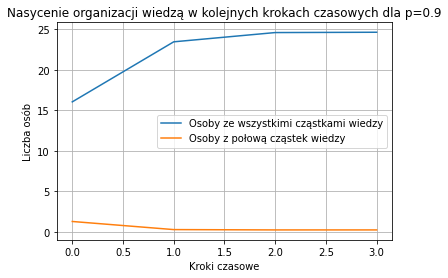

In [62]:
x = range(len(K2p9mean))

plt.plot(x, K4p9mean, label='Osoby ze wszystkimi cząstkami wiedzy')
plt.plot(x, K2p9mean, label='Osoby z połową cząstek wiedzy')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba osób')
plt.title('Nasycenie organizacji wiedzą w kolejnych krokach czasowych dla p=0.9')
plt.legend()
plt.grid(True)
plt.show()

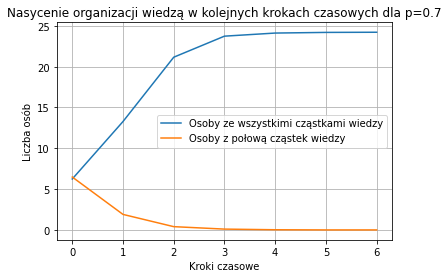

In [63]:
x = range(len(K2p7mean))

plt.plot(x, K4p7mean, label='Osoby ze wszystkimi cząstkami wiedzy')
plt.plot(x, K2p7mean, label='Osoby z połową cząstek wiedzy')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba osób')
plt.title('Nasycenie organizacji wiedzą w kolejnych krokach czasowych dla p=0.7')
plt.legend()
plt.grid(True)
plt.show()

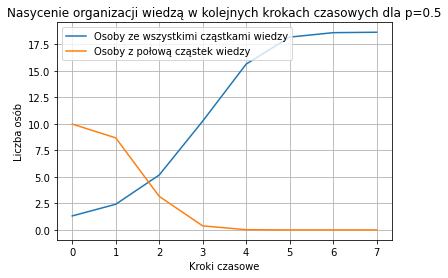

In [64]:
x = range(len(K2p5mean))

plt.plot(x, K4p5mean, label='Osoby ze wszystkimi cząstkami wiedzy')
plt.plot(x, K2p5mean, label='Osoby z połową cząstek wiedzy')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba osób')
plt.title('Nasycenie organizacji wiedzą w kolejnych krokach czasowych dla p=0.5')
plt.legend()
plt.grid(True)
plt.show()

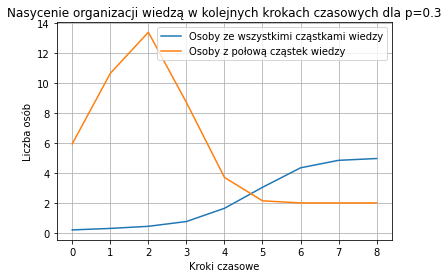

In [65]:
x = range(len(K2p3mean))

plt.plot(x, K4p3mean, label='Osoby ze wszystkimi cząstkami wiedzy')
plt.plot(x, K2p3mean, label='Osoby z połową cząstek wiedzy')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba osób')
plt.title('Nasycenie organizacji wiedzą w kolejnych krokach czasowych dla p=0.3')
plt.legend()
plt.grid(True)
plt.show()

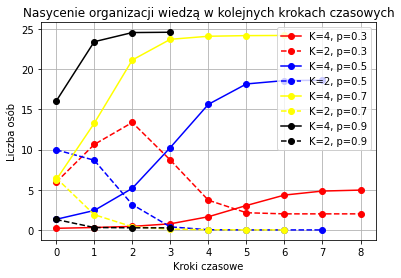

In [66]:
'''
xd = []
xd.append(max(len(arr) for arr in posiadaczeK4p9Ar))
xd.append(max(len(arr) for arr in posiadaczeK4p7Ar))
xd.append(max(len(arr) for arr in posiadaczeK4p5Ar))
xd.append(max(len(arr) for arr in posiadaczeK4p3Ar))
x = max(arr for arr in xd)
'''
x3 = range(len(K2p3mean))
plt.plot(x3, K4p3mean, label='K=4, p=0.3', color='red', marker='o')
plt.plot(x3, K2p3mean, label='K=2, p=0.3', linestyle='--', color='red', marker='o')
x5 = range(len(K2p5mean))
plt.plot(x5, K4p5mean, label='K=4, p=0.5', color='blue', marker='o')
plt.plot(x5, K2p5mean, label='K=2, p=0.5', linestyle='--', color='blue', marker='o')
x7 = range(len(K2p7mean))
plt.plot(x7, K4p7mean, label='K=4, p=0.7', color='yellow', marker='o')
plt.plot(x7, K2p7mean, label='K=2, p=0.7', linestyle='--', color='yellow', marker='o')
x9 = range(len(K2p9mean))
plt.plot(x9, K4p9mean, label='K=4, p=0.9', color='black', marker='o')
plt.plot(x9, K2p9mean, label='K=2, p=0.9', linestyle='--', color='black', marker='o')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba osób')
plt.title('Nasycenie organizacji wiedzą w kolejnych krokach czasowych')
plt.legend()
plt.grid(True)
plt.show()